C:\Users\FinnKaiser\AppData\Local\Temp\ipykernel_16376\3017341204.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\FinnKaiser\AppData\Local\Temp\ipykernel_16376\3017341204.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[0.37212, 0.0, 0.10702, 0.0, 0.00672, 0.0, 0.41388, 0.0, 0.07304, 0.02722]


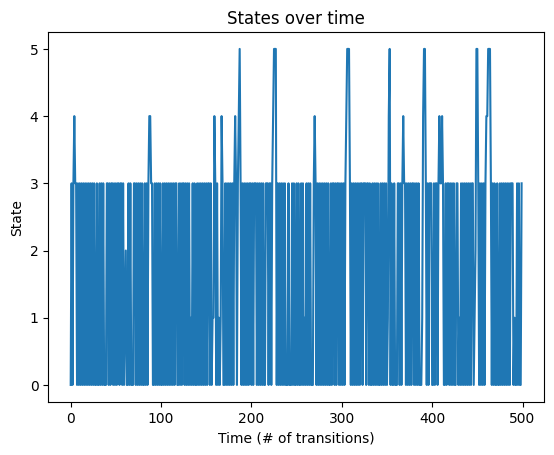

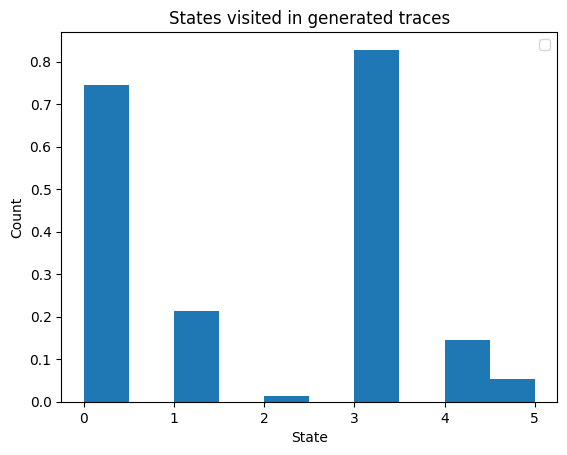

In [25]:
import numpy as np
from hmmlearn import hmm
from matplotlib import pyplot as plt

states = ("S1_o", "S1_d", "S1_u", "S2_o", "S2_d", "S2_u")

generator_model = hmm.CategoricalHMM(n_components=len(states), random_state=12)

with open("dtmc_transitions.txt", "r") as file_content:
    transition_probabilities = np.array(eval(file_content.read()))

initial_state_probabilities = np.array([1 / len(states) for state in states])
emission_probabilities = np.identity(len(states))

generator_model.startprob_ = initial_state_probabilities
generator_model.transmat_ = transition_probabilities
generator_model.emissionprob_ = emission_probabilities

generator_result, generator_states = generator_model.sample(50000)

training_data = generator_result[:generator_result.shape[0] // 2]
validation_data = generator_result[generator_result.shape[0] // 2:]

generator_score = generator_model.score(validation_data)

best_score = best_model = None
number_of_fits = 50
np.random.seed(1)

fig, ax = plt.subplots()
ax.plot(generator_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of transitions)')
ax.set_ylabel('State')
fig.show()

# plot rolls for the fair and loaded states
fig, ax = plt.subplots()
gen_counts, state_ids = np.histogram(generator_result)
ax.hist(state_ids[:-1], state_ids, weights=gen_counts, density=True)
ax.set_title('States visited in generated traces')
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.legend()
fig.show()

state_density = [x / 50000 for x in gen_counts]
print(state_density)

In [26]:
for i in range(number_of_fits):
    model = hmm.CategoricalHMM(n_components=len(states), random_state=i, init_params='ste')
    model.fit(training_data)
    score = model.score(validation_data)
    print(f'Model #{i}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {generator_score}\nBest score:      {best_score}')
initial_state_probabilities

Model #0	Score: -27874.38239878967
Model #1	Score: -27011.203518558887
Model #2	Score: -27728.57649392571
Model #3	Score: -29047.983051392985
Model #4	Score: -27710.46858038025
Model #5	Score: -28052.056825481654
Model #6	Score: -28847.59608375521
Model #7	Score: -27938.098397597845
Model #8	Score: -27902.67696630781
Model #9	Score: -27284.64259843311
Model #10	Score: -27868.894898986848
Model #11	Score: -27656.083391670312
Model #12	Score: -27460.615705961045
Model #13	Score: -28295.567323866286
Model #14	Score: -27867.344099162037
Model #15	Score: -27288.417555791344
Model #16	Score: -28246.472192652716
Model #17	Score: -27159.175872550208
Model #18	Score: -27072.941826181497
Model #19	Score: -27137.146347814516
Model #20	Score: -27191.385913188653
Model #21	Score: -27810.777572345287
Model #22	Score: -27106.22003694268
Model #23	Score: -30100.837895732788
Model #24	Score: -27544.89145942802
Model #25	Score: -27046.397267861812
Model #26	Score: -27631.653840737617
Model #27	Score: -2

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\FinnKaiser\AppData\Local\Temp\ipykernel_16376\1943794623.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[0.37212, 0.0, 0.10702, 0.0, 0.00672, 0.0, 0.41388, 0.0, 0.07304, 0.02722]
[0.37196, 0.0, 0.10776, 0.0, 0.00714, 0.0, 0.41364, 0.0, 0.07412, 0.02538]
[0.00015999999999999348, 0.0, 0.0007399999999999907, 0.0, 0.00041999999999999937, 0.0, 0.00024000000000001798, 0.0, 0.0010800000000000115, 0.0018400000000000014]


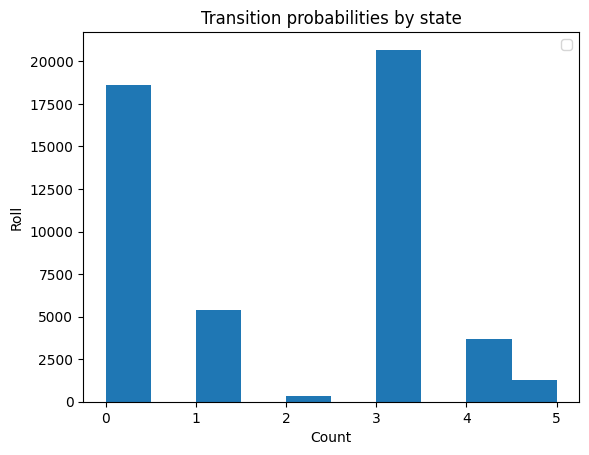

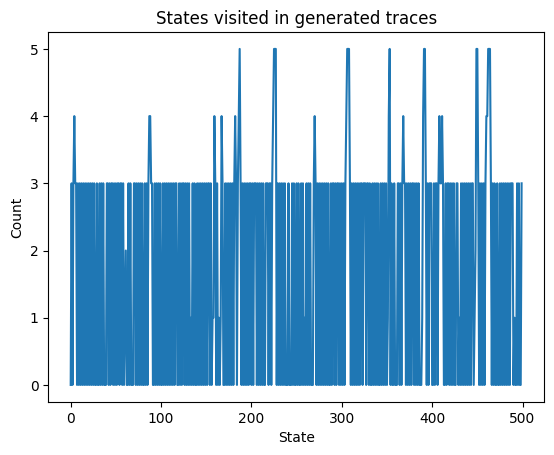

In [27]:
best_model_results, best_model_states = best_model.sample(50000)
fig, ax = plt.subplots()
counts, state_ids = np.histogram(best_model_results)
# counts_gen, state_ids_gen = np.histogram(generator_result)
ax.hist(state_ids[:-1], state_ids, weights=counts)
# ax.hist(state_ids_gen[:-1], state_ids_gen, weights=counts_gen, alpha=0.5)
# plt.hist([counts, counts_gen], state_ids)
ax.set_title('Transition probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()

fig, ax = plt.subplots()
ax.plot(generator_states[:500])
ax.set_title('States visited in generated traces')
ax.set_xlabel('State')
ax.set_ylabel('Count')
fig.show()

state_density_2 = [x / 50000 for x in counts]
density_difference = [abs(x - y) for x, y in zip(state_density, state_density_2)]
print(state_density)
print(state_density_2)
print(density_difference)

In [28]:
best_model.transmat_

array([[1.79720977e-04, 9.74209275e-09, 1.23086357e-02, 1.15015974e-05,
        9.12796982e-01, 7.47031496e-02],
       [2.61818650e-01, 2.81002531e-06, 2.02092352e-05, 1.19627108e-06,
        3.17087218e-01, 4.21069917e-01],
       [9.90299205e-02, 1.18352405e-09, 5.25030530e-04, 8.99425289e-07,
        8.18581714e-01, 8.18624345e-02],
       [3.04735007e-10, 6.08310167e-03, 7.22875345e-02, 1.24105808e-01,
        7.97081994e-01, 4.41561745e-04],
       [9.70474979e-02, 2.35258246e-07, 6.90989849e-02, 7.03581527e-01,
        1.30014505e-01, 2.57249294e-04],
       [2.37623501e-04, 9.03981902e-01, 1.67489350e-02, 5.76871924e-02,
        1.88682992e-02, 2.47604750e-03]])

The absolute error is 224, the relative error is 0.00448


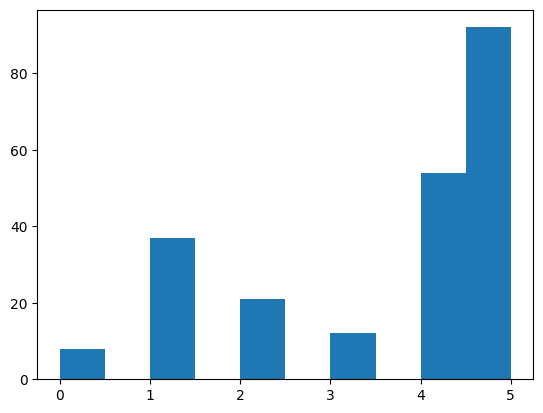

In [29]:
count_difference = abs(gen_counts - counts)
fig, ax = plt.subplots()
# counts_gen, state_ids_gen = np.histogram(generator_result)
ax.hist(state_ids[:-1], state_ids, weights=count_difference)

absolute_error = sum(count_difference)
relative_error = absolute_error / 50000
print(f'The absolute error is {absolute_error}, the relative error is {relative_error}')

In [30]:
states = ("S1_o", "S1_d", "S1_u", "S2_o", "S2_d", "S2_u")


def analyze_model(model_results):
    generated_trace_string = ''.join((str(n[0]) for n in model_results))
    intermittend_failure_c1 = generated_trace_string.count('010')  # Intermittend Failure in component 1
    intermittend_failure_c2 = generated_trace_string.count('343')  # Intermittend Failure in component 2
    failure_cascade_1 = generated_trace_string.count('245')  # Failure cascade
    failure_cascade_2 = generated_trace_string.count('235')  # Failure cascade
    failure_masking = generated_trace_string.count('250')  # Failure masking

    return intermittend_failure_c1, intermittend_failure_c2, failure_cascade_1, failure_cascade_2, failure_masking


print(analyze_model(best_model_results))
print(analyze_model(generator_result))

generated_trace_string = ''.join((str(n[0]) for n in best_model_results))
generated_trace_string.index('245')
generated_trace_string[4720:4730]

(405, 412, 16, 0, 21)
(292, 342, 3, 3, 14)


'3040113130'

In [45]:
def create_sub_traces(trace_string, length):
    traces = []
    while len(traces) < 10000:
        j = trace_string.find('0')
        traces.append(trace_string[j:j+length])
        trace_string = trace_string[j+length:]
    return traces


traces_10 = create_sub_traces(generated_trace_string, 10)
traces_20 = create_sub_traces(generated_trace_string, 20)
traces_30 = create_sub_traces(generated_trace_string, 30)

In [49]:
def analyze_traces(traces):
    intermittend_failure_c1 = intermittend_failure_c2 = failure_cascade_1 = failure_cascade_2 = failure_masking = 0
    for trace in traces:
       if '010' in trace: intermittend_failure_c1 += 1
       if '343' in trace: intermittend_failure_c2 += 1
       if '245' in trace: failure_cascade_1 += 1
       if '235' in trace: failure_cascade_2 += 1
       if '250' in trace: failure_masking += 1
    return intermittend_failure_c1, intermittend_failure_c2, failure_cascade_1, failure_cascade_2, failure_masking

print(analyze_traces(traces_30))

(351, 323, 8, 0, 14)
